https://leetcode.com/problems/pacific-atlantic-water-flow/description/   

# Rainwater trapping 2d   
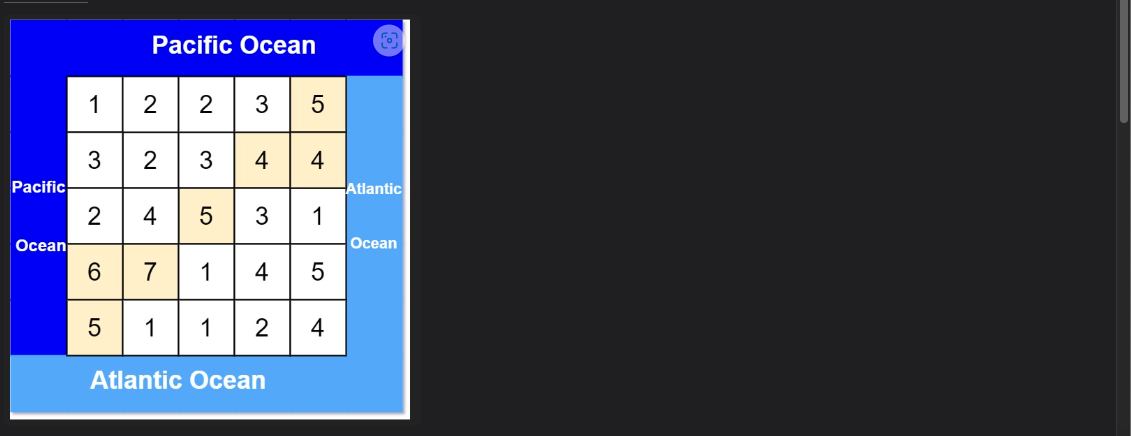

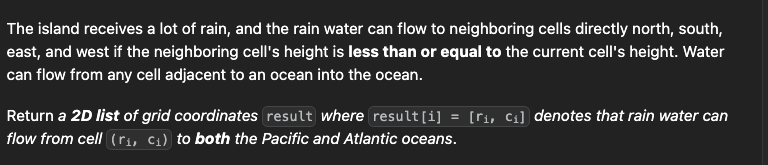

sol. think reverse, do dfs from the borders, water will flow if the height increases from going one block to another

In [ ]:
    bool isValid(int r, int c, int rr, int cc){
        return r<rr and r>=0 and c<cc and c>=0;
    }


    void dfs(int r, int c, vector< vector<int>> &dir, vector<vector<int>> &vis, vector<vector<int>>& ma, int rr, int cc){
        if(vis[r][c]) return;
        vis[r][c]=1;
        for(auto v:dir){
            int tr=r+v[0],tc=c+v[1];
            if(!isValid(tr,tc,rr,cc)) continue;
            if(vis[tr][tc] or ma[tr][tc]<ma[r][c]) continue;
            dfs(tr,tc,dir,vis,ma,rr,cc);
        }
    }


    vector<vector<int>> pacificAtlantic(vector<vector<int>>& ma) {
        int rr=ma.size(),cc=ma[0].size();
        vector<vector<int>> visp(rr,vector<int>(cc,0)), visa(rr,vector<int>(cc,0));
        vector< vector<int> > dir = {{0,1},{0,-1},{1,0},{-1,0}};

        //dfs for pacific ocean
        dfs(0,0,dir,visp,ma,rr,cc);
        for(int i=1;i<cc;i++)  dfs(0,i,dir,visp,ma,rr,cc);
        for(int i=1;i<rr;i++) dfs(i,0,dir,visp,ma,rr,cc);


        //dfs for atlantic ocean
        dfs(rr-1,cc-1,dir,visa,ma,rr,cc);
        for(int i=0;i<=cc-2;i++) dfs(rr-1,i,dir,visa,ma,rr,cc);
        for(int i=0;i<=rr-2;i++) dfs(i,cc-1,dir,visa,ma,rr,cc);

      
        vector<vector<int>> ans; 
        for(int i=0;i<rr;i++) for(int j=0;j<cc;j++) if(visa[i][j] and visp[i][j]) ans.push_back({i,j});
        return ans;
    }

# Deduction:  
doing dfs from the boundary

In [ ]:
for(int i=0;i<rr;i++){
    for(int j=0;j<cc;j++) if(
        (i==0 or i==rr-1 or j==0 or j==cc-1) and ma[i][j]==1) dfs(i,j,ma);
}